<a href="https://colab.research.google.com/github/chrisseiler96/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/Copy_of_Linear_Regression_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import everything you could ever need. ;)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Ukraine Used Car Sale Price Prediction
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv')
print(df.shape)
df.head()

(8495, 9)


,make,price,body,mileage,engV,engType,registration,year,drive
0,23,15500.0,0,68,2.5,1,1,2010,1
1,50,20500.0,3,173,1.8,1,1,2011,2
2,50,35000.0,2,135,5.5,3,1,2008,2
3,50,17800.0,5,162,1.8,0,1,2012,0
4,55,16600.0,0,83,2.0,3,1,2013,1


In [3]:
df.describe()

,make,price,body,mileage,engV,engType,registration,year,drive
count,8495.000000,8495.000000,8495.000000,8495.000000,8495.000000,8495.000000,8495.000000,8495.000000,8495.000000
mean,46.535491,16185.453305,2.302295,141.744202,2.568337,1.650618,0.941613,2006.500883,0.575868
std,24.526251,24449.641512,1.610307,97.464062,5.387238,1.341282,0.234488,6.925907,0.741235
min,0.000000,259.350000,0.000000,0.000000,0.100000,0.000000,0.000000,1959.000000,0.000000
25%,23.000000,5490.000000,1.000000,74.000000,1.600000,0.000000,1.000000,2004.000000,0.000000
50%,50.000000,9500.000000,3.000000,130.000000,2.000000,1.000000,1.000000,2008.000000,0.000000
75%,68.000000,17145.600000,3.000000,197.000000,2.500000,3.000000,1.000000,2011.000000,1.000000
max,82.000000,547800.000000,5.000000,999.000000,99.990000,3.000000,1.000000,2016.000000,2.000000


# Predictive Modeling with Linear Regression

## 1.1 Divide the dataset features into an X matrix and y vector ("price" is what we want to predict).

In [0]:
y = df['price']
X = df.drop(columns='price')

## 1.2 Split the data into test and train datasets using train_test_split

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.5, random_state=42)

## 1.3 Use Scikit-Learn to fit a multiple regression model using your training data.

In [6]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## 1.4 Report the Intercept and Coefficient Values for the fitted model

In [7]:
print("Coefficient: \n", model.coef_)
print("\n Intercept: ", model.intercept_)

Coefficient: 
 [  -35.22479484 -1672.11973555   -37.12848399   269.61582544
 -1284.74375962  4649.46225339  1098.2829573   7886.89079148]

 Intercept:  -2184591.0115608736


## 1.5 Use the test data to make predictions

In [0]:
y_test_predict = model.predict(X_test)

## 1.6 Calculate and report both the Root-Mean-Square error and $R^2$ for the model. 

In [9]:
MSE = mean_squared_error(Y_test, y_test_predict)

RMSE = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print('Mean Squared Error is {}'.format(MSE))
print('Root Mean Squared Error is is {}'.format(RMSE))

R2 = r2_score(Y_test, y_test_predict)

print('R^2 is {}'.format(R2))

Mean Squared Error is 504905647.2241802
Root Mean Squared Error is is 22470.10563446866
R^2 is 0.2694482951962195


## 1.7 How should we interpret the coefficient corresponding to the "year" feature?

It's an independent variable


We can engineer it - It may be better to subtract year from the current year to make it more like "years old"


## 1.8 How should we interpret the Root-Mean-Square Error?



it is the form of measurement we learned that is most able to be interpreted - R^2 can be high, but RMSE is important to understand the actual average amount we're off by in our predictions

## 1.9 How should we interpret the $R^2$?

I try and think of R^2 as predictive accuracy -  R^2 is always a % and easy to read, but it can be harder to interpret because it doesn't tell 

# Log-Linear and Polynomial Regression

## 2.1 Engineer a new variable by taking the log of the price varible.

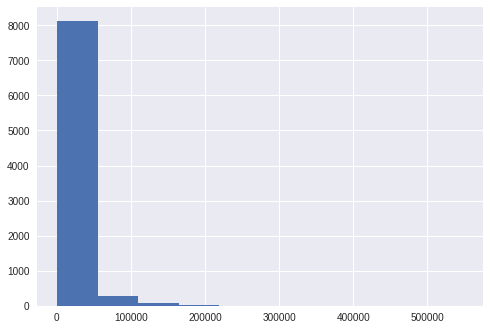

In [10]:
df.price.hist()

### Yes, because price heavily stacked on the left side of it's histogram - it's a perfect candidate for using log linear regression'

In [0]:
df['ln_price'] = np.log(df['price'])

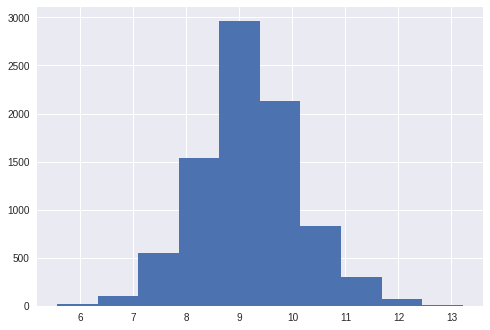

In [12]:
df.ln_price.hist()

### Great, we're now much closer to a normal distribution

## 2.2 Use scatterplots or seaborn's pairplot function to do the "eyeball test" for non-linearly distributed features.

### Using price as it was given

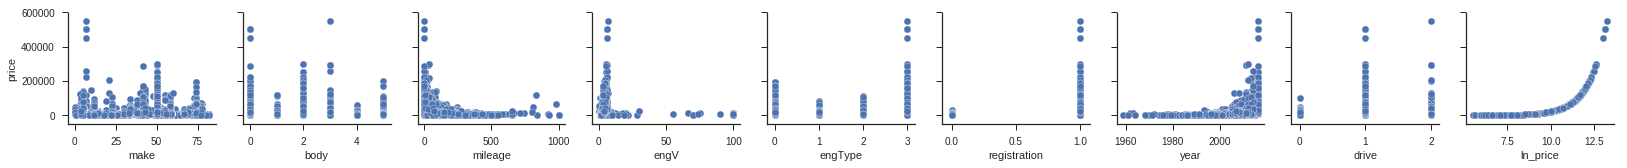

In [13]:
sns.set(style="ticks", color_codes=True)

# Generate a list of column headers not including price
x_columns = df.columns.drop('price')

# Only plot the scatterplot of x variables with our y variable
sns.pairplot(data=df, y_vars=['price'], x_vars=x_columns)

### Using LN Price

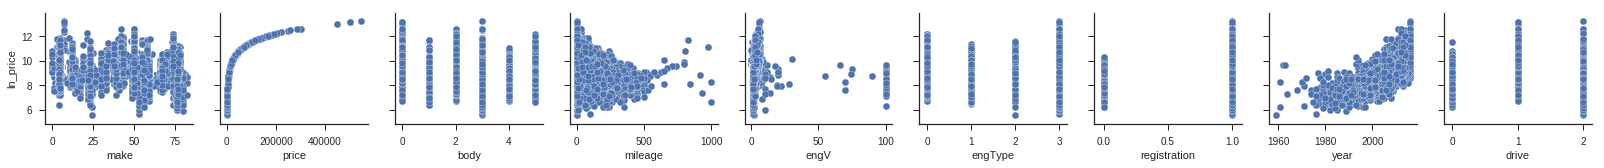

In [14]:
sns.set(style="ticks", color_codes=True)

# Generate a list of column headers not including price
x_columns = df.columns.drop('ln_price')

# Only plot the scatterplot of x variables with our y variable
sns.pairplot(data=df, y_vars=['ln_price'], x_vars=x_columns)

###Year appears that it would benefit a little being made a polynomial feature.

## 2.3 If appropriate, create any polynomial features. 

In [0]:
df['year_squared'] = df['year']**2
df['mileage_squared']=df['mileage']**2
#I know we can't actually square the make of the car - but graph of this seems to improve by modifying it.
df['make_squared']=df['make']**3

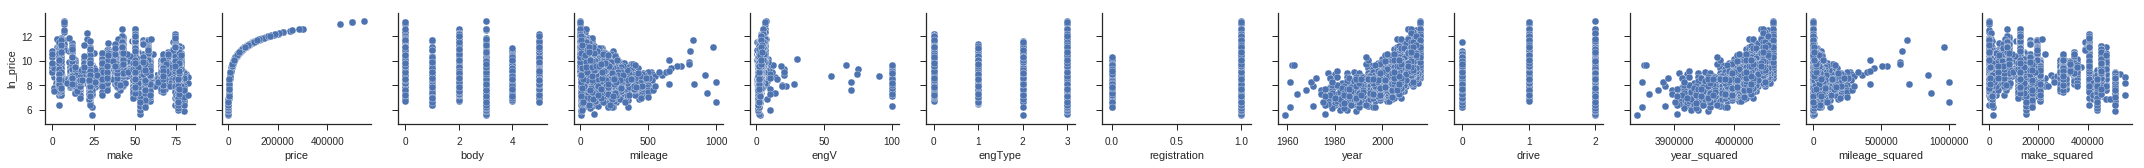

In [16]:
sns.set(style="ticks", color_codes=True)

# Generate a list of column headers not including price
x_columns = df.columns.drop('ln_price')

# Only plot the scatterplot of x variables with our y variable
sns.pairplot(data=df, y_vars=['ln_price'], x_vars=x_columns)

## 2.4 Use the new log-transformed y variable and your x variables (including any new polynomial features) to fit a new linear regression model. Then report the: intercept, coefficients, RMSE, and $R^2$.

### Comparison of the features - NOTE: Interactions may changed when the features are paired or grouped together

In [0]:
def feature_compare(dataframe,targetStr):
  print("DATA: \n")
  print(dataframe.head())
  copydf = dataframe.copy(deep=True)
  y = copydf[targetStr]
  copydf.drop(columns=targetStr, inplace=True)
  
  
  for feature in copydf:
    print("-----------------------------------------------------------")
    print("----------------Test: " + feature +  "----------------------------")
    print("-----------------------------------------------------------")
    
    X = copydf[feature].values[:, np.newaxis]
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.5, random_state=42)
   
    print(X.shape, "\n")
    print(X_train.shape)
    print(X_test.shape)
    print(Y_train.shape)
    print(Y_test.shape)
    
    model = LinearRegression()
    model.fit(X_train, Y_train)

    print("Coefficient:  ", model.coef_)
    print("\nIntercept: ", model.intercept_)
    
    y_test_predict = model.predict(X_test)

    MSE = mean_squared_error(Y_test, y_test_predict)
    RMSE = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

    print('Mean Squared Error is {}'.format(MSE))
    print('Root Mean Squared Error is is {}'.format(RMSE))

    R2 = r2_score(Y_test, y_test_predict)

    print('R^2 is {}'.format(R2))

    

In [18]:
feature_compare(df,"ln_price")

DATA: 

   make    price  body  mileage  engV  engType  registration  year  drive  \
0    23  15500.0     0       68   2.5        1             1  2010      1   
1    50  20500.0     3      173   1.8        1             1  2011      2   
2    50  35000.0     2      135   5.5        3             1  2008      2   
3    50  17800.0     5      162   1.8        0             1  2012      0   
4    55  16600.0     0       83   2.0        3             1  2013      1   

    ln_price  year_squared  mileage_squared  make_squared  
0   9.648595       4040100             4624         12167  
1   9.928180       4044121            29929        125000  
2  10.463103       4032064            18225        125000  
3   9.786954       4048144            26244        125000  
4   9.717158       4052169             6889        166375  
-----------------------------------------------------------
----------------Test: make----------------------------
------------------------------------------------------

In [19]:
y = df.loc[:, ['ln_price']].values
X = df.loc[:, ['make', 'body', 'year', 'mileage','engV', 'engType','registration','drive','year_squared', 'mileage_squared','make_squared']].values

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.5, random_state=42)

model = LinearRegression()
model.fit(X_train, Y_train)

print("Coefficient: \n", model.coef_)
print("\n Intercept: ", model.intercept_)

y_test_predict = model.predict(X_test)

MSE = mean_squared_error(Y_test, y_test_predict)

RMSE = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print('Mean Squared Error is {}'.format(MSE))
print('Root Mean Squared Error is is {}'.format(RMSE))

R2 = r2_score(Y_test, y_test_predict)

print('R^2 is {}'.format(R2))

Coefficient: 
 [[-1.65782801e-04 -8.60142848e-02 -6.45393641e+00  9.59378897e-04
   9.59215855e-03 -4.79664993e-02  6.67287040e-01  3.82343527e-01
   1.63734766e-03 -5.65887035e-07 -2.29687549e-07]]

 Intercept:  [6366.22470406]
Mean Squared Error is 0.30798691684782264
Root Mean Squared Error is is 0.5549656897933625
R^2 is 0.6728608763192638


## 2.5 How might we interpret the coefficient on "year" in this new regression model?

**'Year' Coefficient:   [0.0958709]**


**For each unit increase the year feature, ln_price is expected to increase by 0.0958 which means price should increase by about 9.5%.**




# Gradient Descent

## 3.1 What does Gradient Descent seek to minimize?

Gradient Descent seeks to optimize the cost function. The cost function seeks to minimize some type of chosen error metric.


## 3.2 What is the "Learning Rate" and what is its function?

Learning rate determines the amount we will step in a given direction (hopefully down a gradient) in a given epoch.

# Model Diagnostics

## 4.1 Use statsmodels to run a log-linear or log-polynomial linear regression with robust standard errors.

## A quick sample of the test (LOG POLYNOMIAL LINEAR)


In [20]:
y = df[['ln_price']]
X = df[['make', 'body', 'year', 'mileage','engV', 'engType','registration','drive','year_squared', 'mileage_squared','make_squared']]


X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     1597.
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        18:32:27   Log-Likelihood:                -6957.0
No. Observations:                8495   AIC:                         1.394e+04
Df Residuals:                    8483   BIC:                         1.402e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            6533.5128    348.336     

### Sample 2 (No polynomial terms)

In [21]:
y = df[['ln_price']]
X = df[['make', 'body', 'year', 'mileage','engV', 'engType','registration','drive']]


X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     2040.
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        18:32:27   Log-Likelihood:                -7167.0
No. Observations:                8495   AIC:                         1.435e+04
Df Residuals:                    8486   BIC:                         1.442e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -181.8341      2.144    -84.810   

### I've plotted scatters again below, I believe there is Heteroskedasticity in a few graphs, so we can use an HC3 parameter

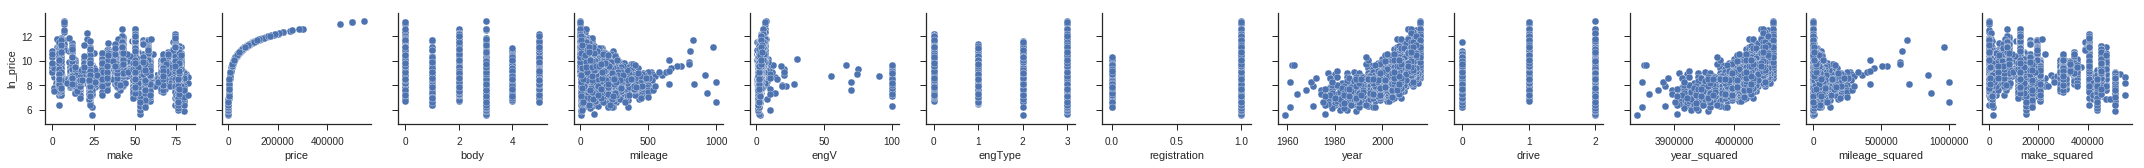

In [22]:
sns.set(style="ticks", color_codes=True)

# Generate a list of column headers not including price
x_columns = df.columns.drop('ln_price')

# Only plot the scatterplot of x variables with our y variable
sns.pairplot(data=df, y_vars=['ln_price'], x_vars=x_columns)

### Heteroskedastic features: Mileage, engV(kinda fits it), mileage_squared, make appears to be slightly heteroskedastic but it has nice spread so I don't think it falls too far into that category


In [23]:
y = df['ln_price'].values
X = df[['make', 'body', 'year', 'mileage','engV', 'engType','registration','drive']]

X = sm.add_constant(X)

model = sm.OLS(y, X).fit(cov_type='HC3')
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     1654.
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        18:32:31   Log-Likelihood:                -7167.0
No. Observations:                8495   AIC:                         1.435e+04
Df Residuals:                    8486   BIC:                         1.442e+04
Df Model:                           8                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -181.8341      3.453    -52.653   

## 4.2 Calculate the Variance Inflation Factor (VIF) of our X variables. Do we have multicollinearity problems?

In [24]:
y = df['ln_price'].values
X = df[['make', 'body', 'year', 'mileage','engV', 'engType','registration','drive']]


print(X.columns, '\n\n')

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

Index(['make', 'body', 'year', 'mileage', 'engV', 'engType', 'registration',
       'drive'],
      dtype='object') 


[4.831617998169187, 3.506279239170272, 30.469967624801942, 3.676004263355245, 1.2385758236552051, 2.7337862514628957, 18.52979143631658, 1.7487353617136152]


In [25]:
X.corr()

,make,body,year,mileage,engV,engType,registration,drive
make,1.000000,0.026127,-0.013833,-0.035097,-0.021246,-0.011880,0.104557,-0.196444
body,0.026127,1.000000,-0.154554,0.287060,-0.025320,-0.184007,-0.082643,-0.162235
year,-0.013833,-0.154554,1.000000,-0.503135,-0.041076,-0.040471,0.185104,-0.169709
mileage,-0.035097,0.287060,-0.503135,1.000000,0.042081,-0.229644,-0.229354,0.067962
engV,-0.021246,-0.025320,-0.041076,0.042081,1.000000,-0.004896,-0.015274,0.084756
engType,-0.011880,-0.184007,-0.040471,-0.229644,-0.004896,1.000000,0.152988,-0.044859
registration,0.104557,-0.082643,0.185104,-0.229354,-0.015274,0.152988,1.000000,-0.055793
drive,-0.196444,-0.162235,-0.169709,0.067962,0.084756,-0.044859,-0.055793,1.000000


It appears that Year and registration both have a VIF above 10, so they may have issues with collinearity.